<a href="https://colab.research.google.com/github/superphantomman/bank_ml_project/blob/main/bank_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zadanie 4 - Bank

---

Stwórz model z wykorzystaniem wybranego algorytmu uczenia maszynowego.
Model ma przewidywać czy klient banku skorzysta z oferty (kolumna y)

Etapy:
1. Ładowanie danych (plik bank-full.csv z folderu Dane)
2. Ocena jakości danych i rozwiązanie ewentualnych problemów z jakością
3. Eksploracyjna analiza danych
4. Utworzenie modelu (min. 3 różne algorytmy ML, obowiązkowo sieć neuronowa)
5. Ocena jakości modelu, porównanie modeli.

Wszystkie czynności i etapy należy odpowiednio opisać w raporcie.


# 1. Ładowanie danych
W tej części zostały zaimportowane biblioteki konieczne do działania programu. Ponadto została utworzona funkcja do ładowania danych load_data oraz do obróbki danych preprocess_data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(path):
    return pd.read_csv(path, sep=';')
def preprocess_data(df):
    # Wypełnij brakujące wartości w kolumnach 'default', 'housing', 'loan' i 'y'
    for column in ['y', 'default', 'housing', 'loan']:
      df[column] = df[column].map({'yes': 1, 'no': 0})
    df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

    X = df.drop('y', axis=1)
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [ ]:
df = load_data('/content/project_data/bank-full.csv')
X_train, X_test, y_train, y_test = preprocess_data(df)

# 2. Ocena jakości danych

In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


Informacje na temat zbioru danych:

*   Dostępnych jest 17 kolumn
*   Kolumn y określa czy klient zdecydował się na ofertę
*   Ilość rekordów to 45211
*   7 atrybutów o wartościach liczbowych oraz 10 o wartościach w formie tekstu
*   Dla żadnego atrybutu w danym rekordzie nie istnieje pole o wartości typu **null**




In [ ]:
import numpy as np

for column in df.columns:
    # Sprawdź, czy kolumna jest typu liczbowego
    if np.issubdtype(df[column].dtype, np.number):
        min_value = df[column].min()
        max_value = df[column].max()
        print(f"{column} : ({min_value} - {max_value})")
    # Sprawdź, czy kolumna jest typu tekstowego
    elif df[column].dtype == object:
        unique_values = df[column].unique()
        print(f"{column}: {unique_values}")


age : (18 - 95)
job: ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital: ['married' 'single' 'divorced']
education: ['tertiary' 'secondary' 'unknown' 'primary']
default : (0 - 1)
balance : (-8019 - 102127)
housing : (0 - 1)
loan : (0 - 1)
contact: ['unknown' 'cellular' 'telephone']
day : (1 - 31)
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration : (0 - 4918)
campaign : (1 - 63)
pdays : (-1 - 871)
previous : (0 - 275)
poutcome: ['unknown' 'failure' 'other' 'success']
y : (0 - 1)


# 3. Eksploracyjna analiza danych


In [ ]:
for column in df.columns:
  print(column)

age
job
marital
education
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
y


* **age**: Wiek klienta. Jest to ważny czynnik, ponieważ różne grupy wiekowe mogą mieć różne potrzeby finansowe i różne podejście do produktów bankowych.
* **job**: Zawód klienta. Różne zawody mogą wiązać się z różnymi poziomami dochodów i stabilnością finansową.
* **marital**: Stan cywilny klienta. Może to wpływać na decyzje finansowe klienta, na przykład osoby zamężne mogą być bardziej skłonne do oszczędzania lub inwestowania.
* **education**: Poziom wykształcenia klienta. Wykształcenie może wpływać na zarobki klienta i jego zrozumienie produktów finansowych.
* **default**: Czy klient ma niespłacone długi. To ważne dla banku, ponieważ klienci z historią niewypłacalności mogą stanowić większe ryzyko.
* **balance**: Saldo na koncie bankowym klienta. To pokazuje, ile pieniędzy klient ma obecnie w banku.
* **housing**: Czy klient ma kredyt hipoteczny. To może wpływać na zdolność klienta do zaciągnięcia dodatkowych pożyczek.
* **loan**: Czy klient ma osobiste pożyczki. Podobnie jak kredyt hipoteczny, może to wpływać na zdolność klienta do zaciągnięcia dodatkowych pożyczek.
* **contact**: Metoda kontaktu z klientem. Niektóre metody mogą być skuteczniejsze niż inne.
* **day**: Dzień ostatniego kontaktu z klientem. Może to mieć wpływ na to, jak świeże są informacje o kliencie.
* **month**: Miesiąc ostatniego kontaktu z klientem. Niektóre miesiące mogą być lepsze dla marketingu finansowego niż inne.
* **duration**: Czas trwania ostatniego kontaktu z klientem. Dłuższe rozmowy mogą oznaczać większe zainteresowanie klienta.
* **campaign**: Liczba kontaktów z klientem podczas tej kampanii. Zbyt wiele kontaktów może zniechęcić klienta.
* **pdays**: Liczba dni, które upłynęły od ostatniego kontaktu z klientem. Świeże kontakty mogą być bardziej wartościowe.
* **previous**: Liczba kontaktów z klientem przed tą kampanią. Historia kontaktów może wpływać na skuteczność kampanii.
* **poutcome**: Wynik poprzedniej kampanii marketingowej. Sukces w przeszłości może sugerować sukces w przyszłości.
* **y**: Czy klient skorzystał z oferty. Jest to nasza zmienna docelowa, którą chcemy przewidzieć za pomocą modelu.

**Wykresy rozkładu dla danego atrybutu**

---



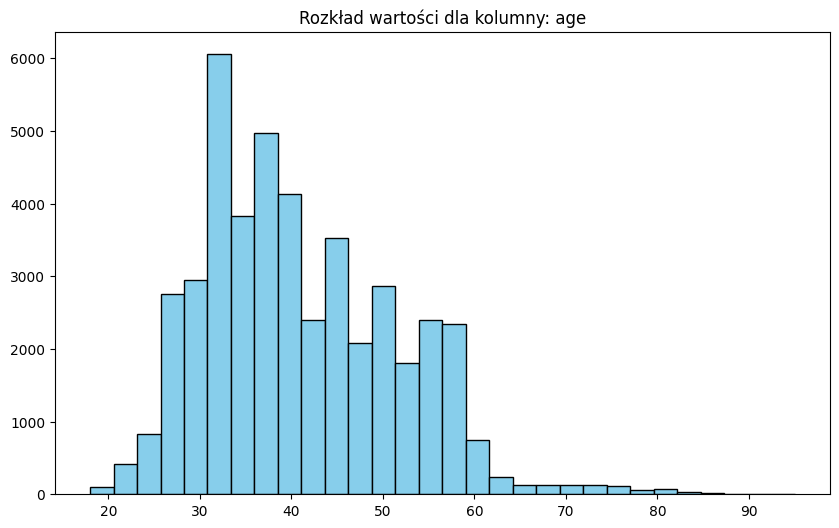

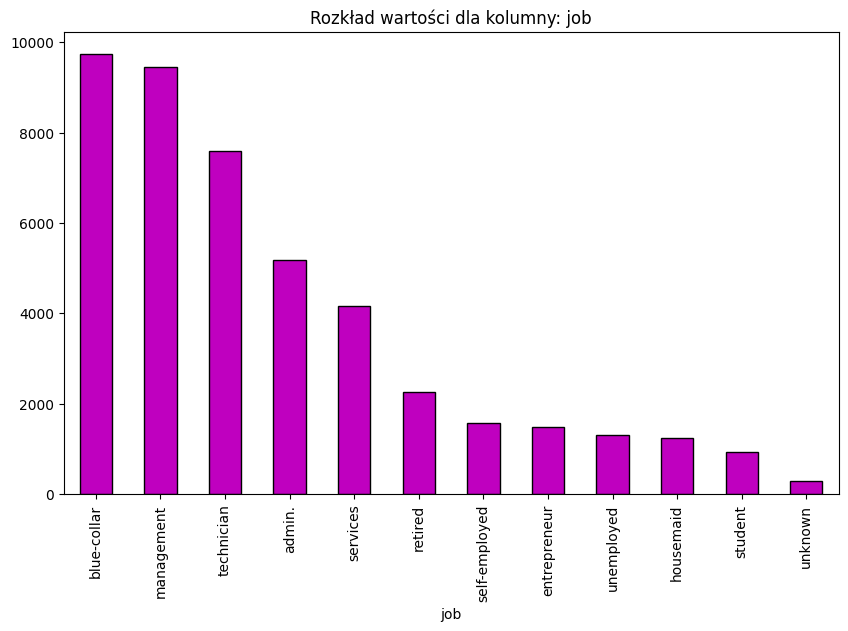

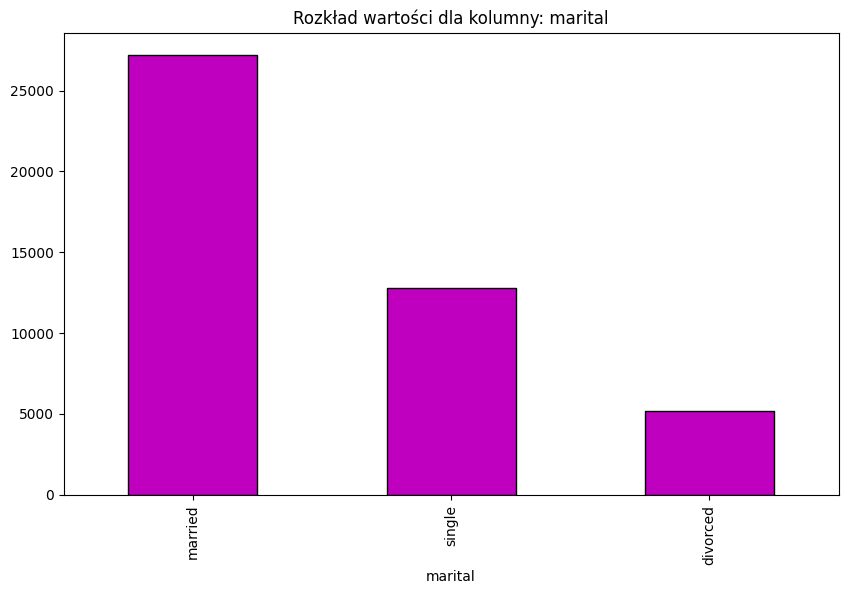

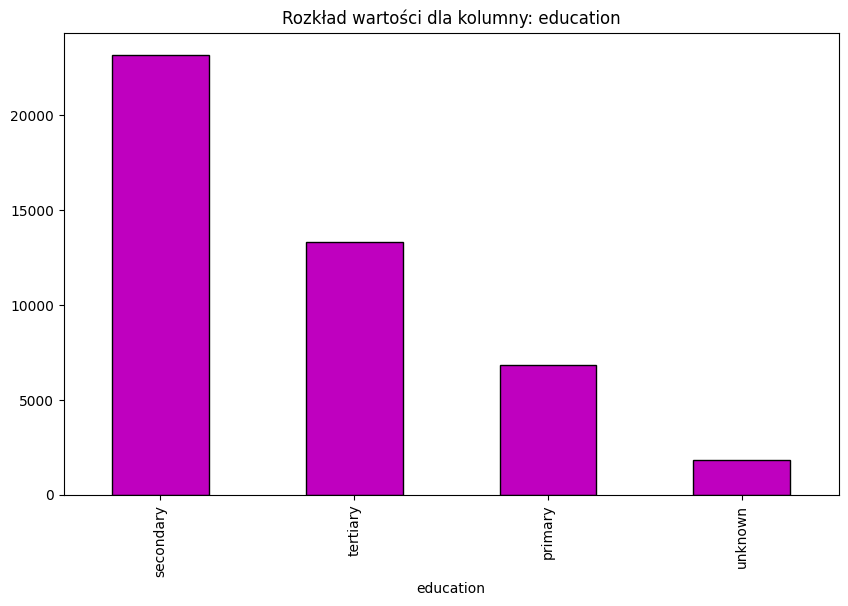

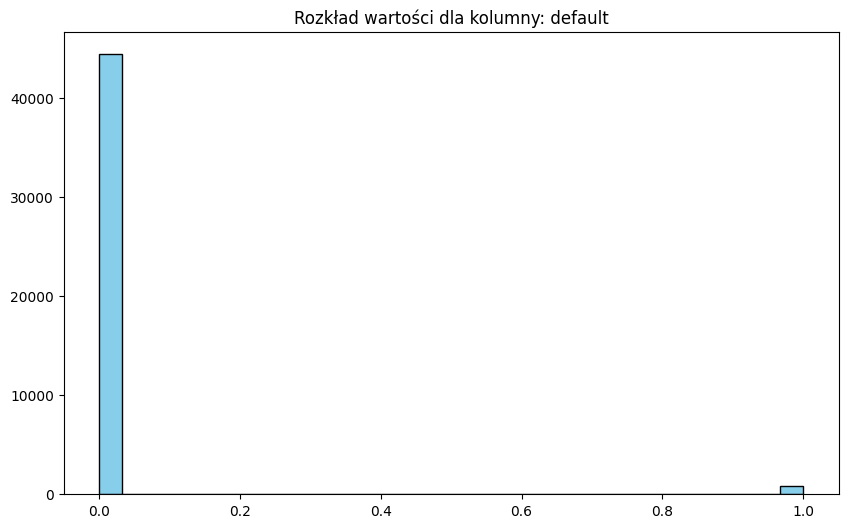

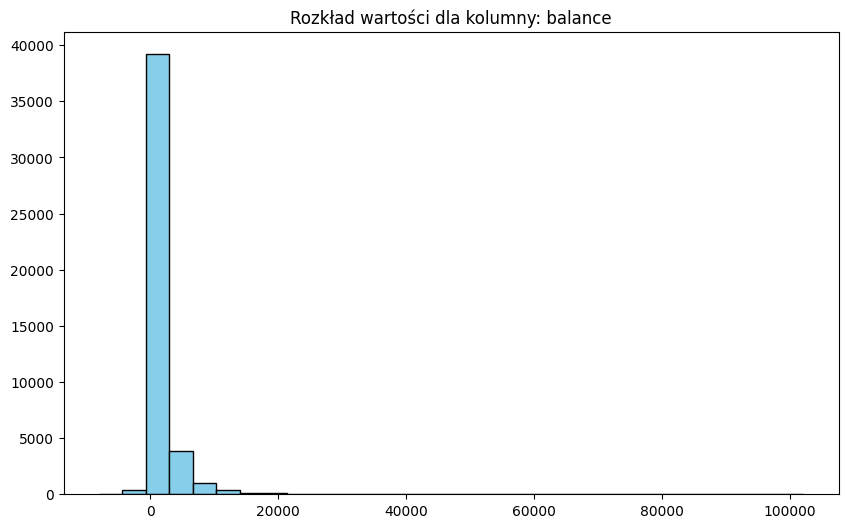

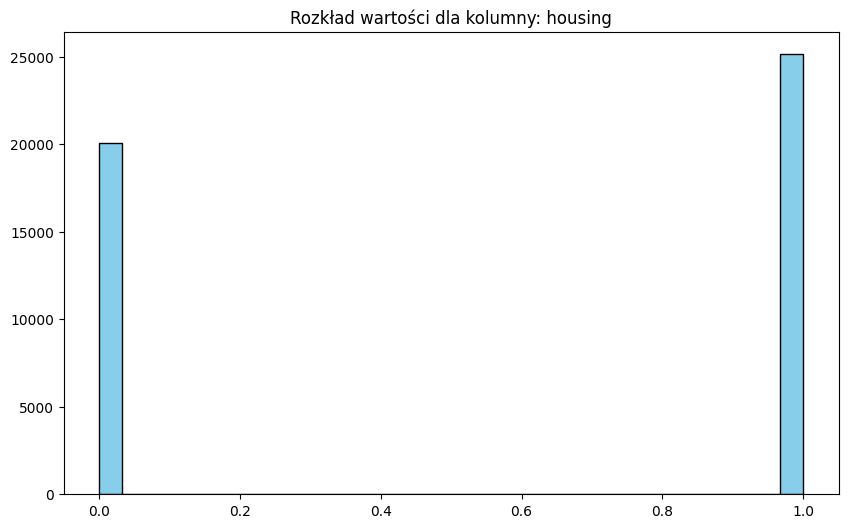

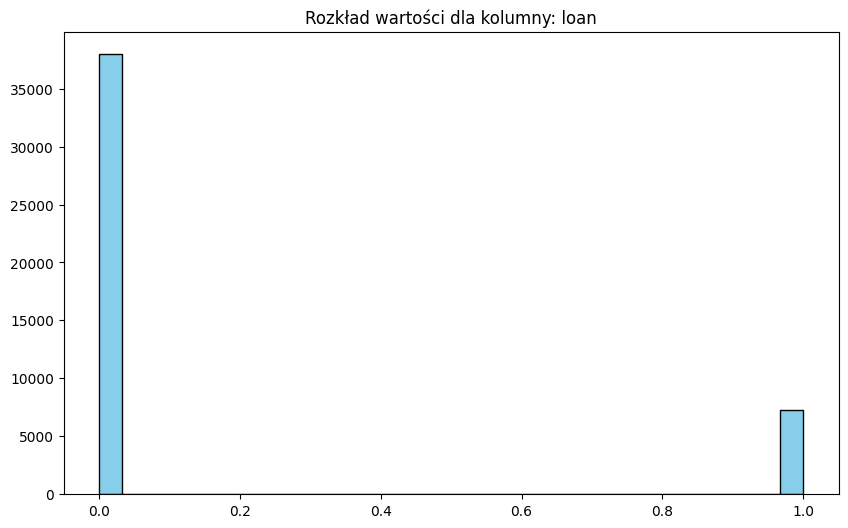

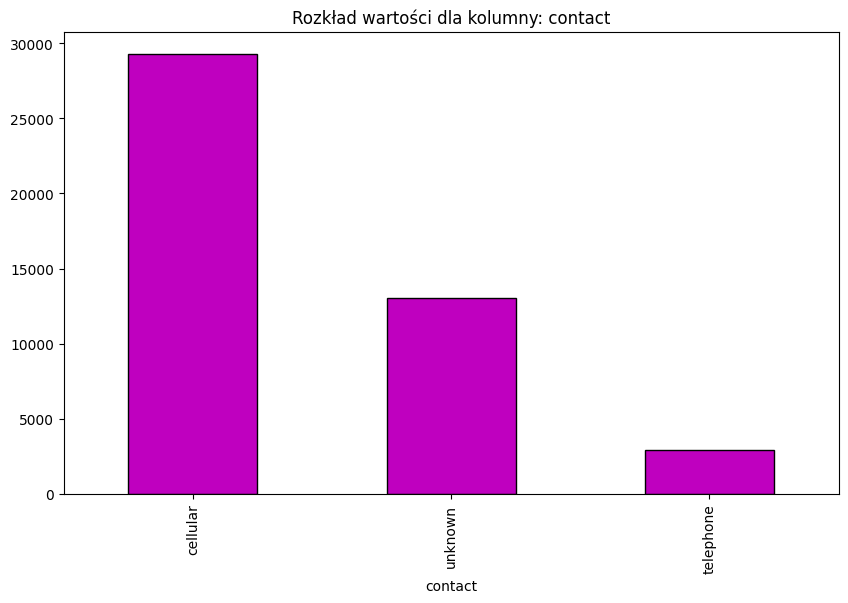

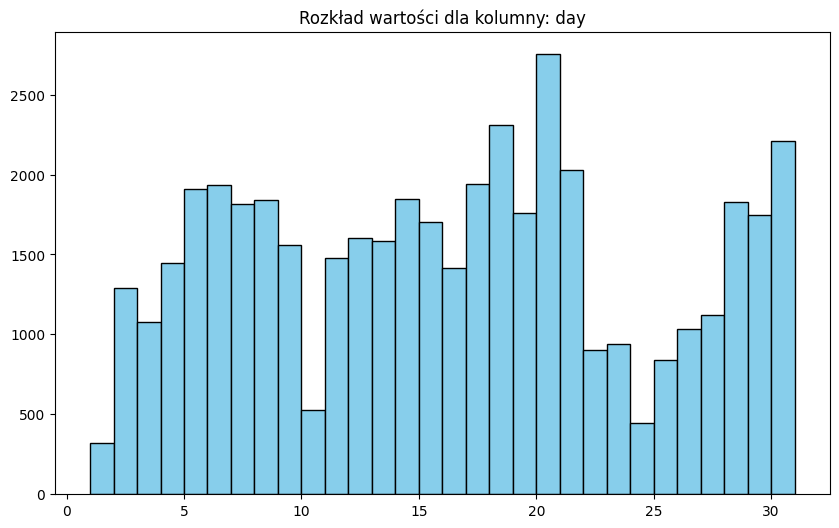

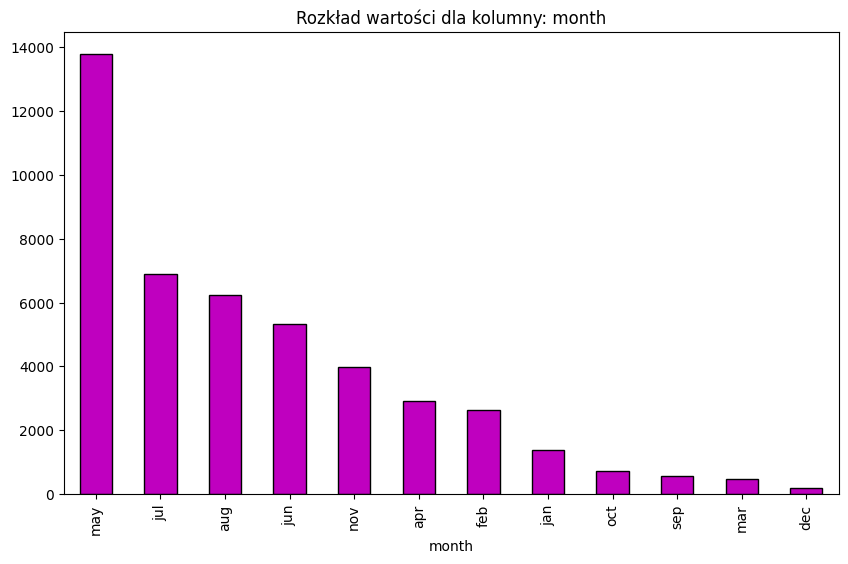

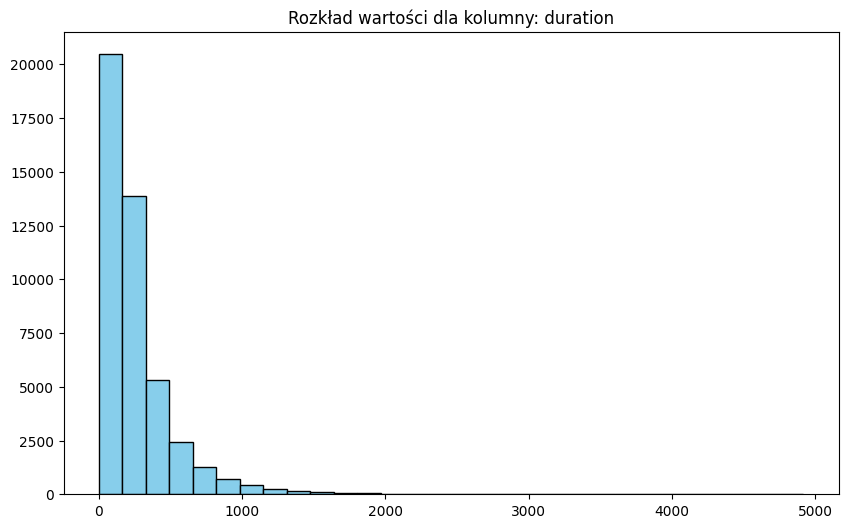

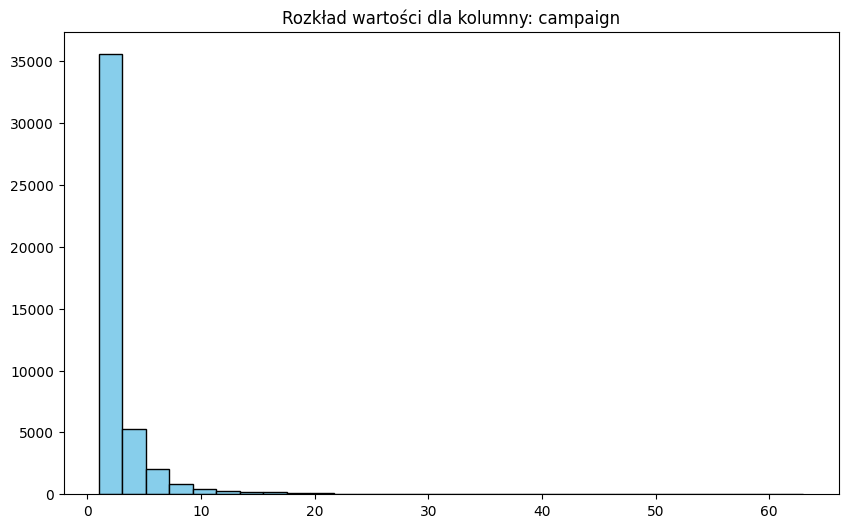

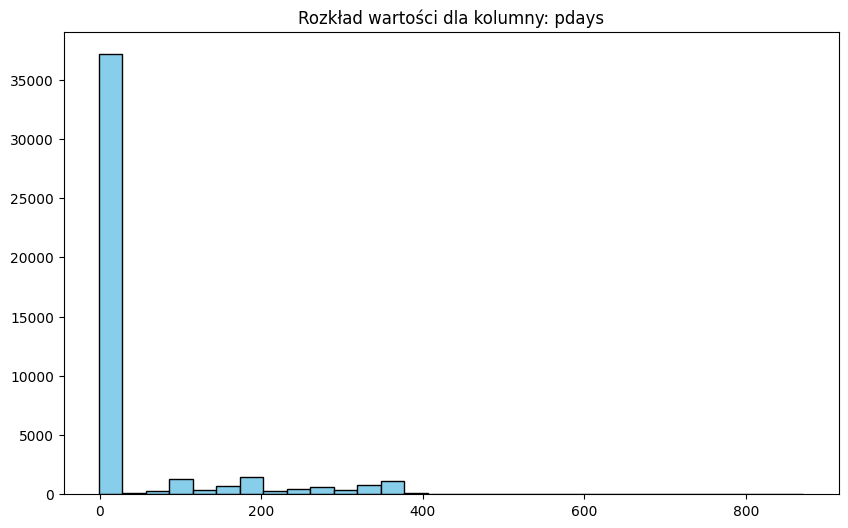

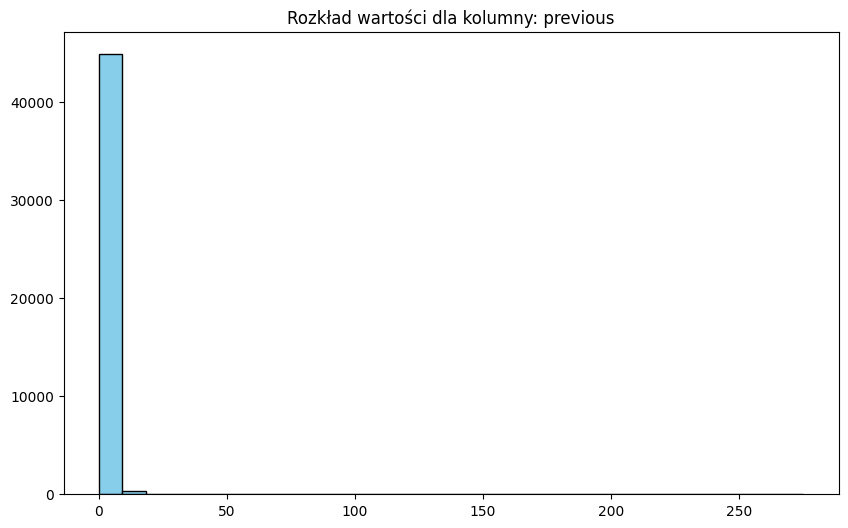

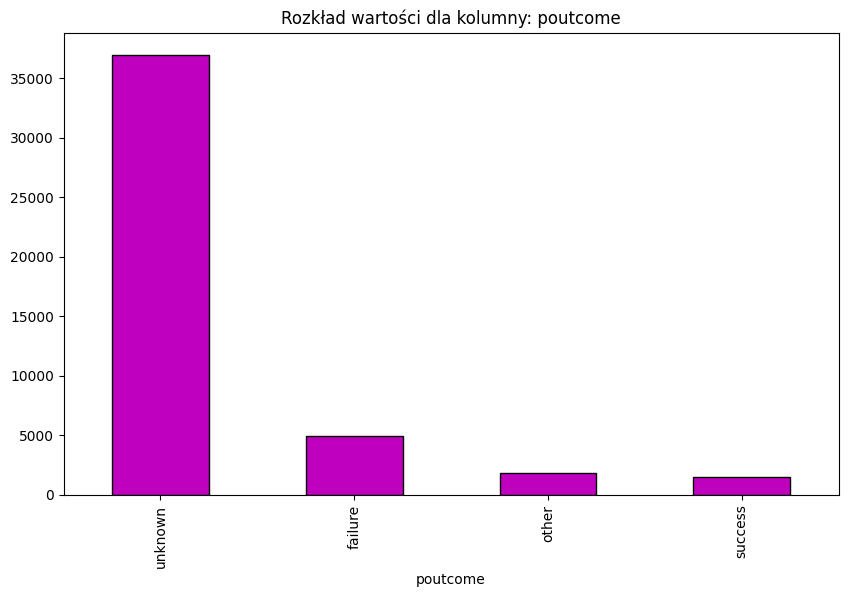

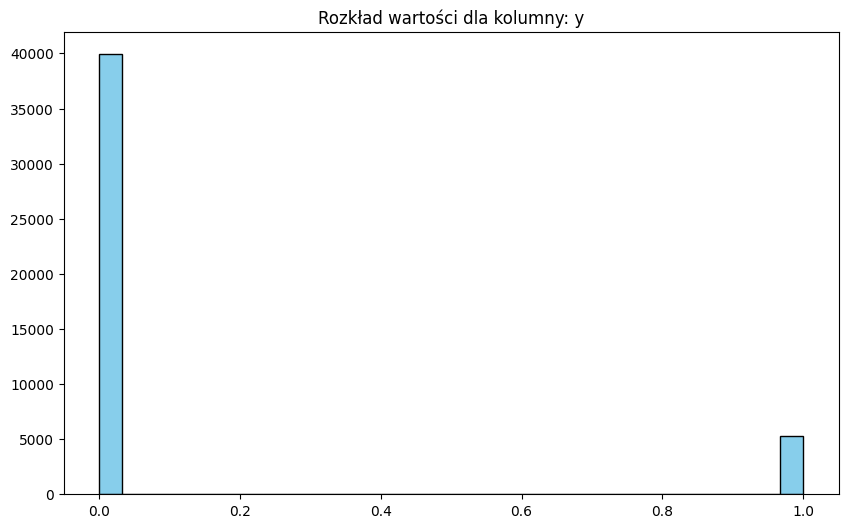

In [ ]:

#Generowanie wykresów
for column in df.columns:
    # Sprawdź, czy kolumna jest typu liczbowego
    if np.issubdtype(df[column].dtype, np.number):
        plt.figure(figsize=(10, 6))
        plt.hist(df[column], bins=30, range=[df[column].min(), df[column].max()], color='skyblue', edgecolor='black')
        plt.title(f'Rozkład wartości dla kolumny: {column}')
        plt.show()
    # Sprawdź, czy kolumna jest typu tekstowego
    elif df[column].dtype == object:
        plt.figure(figsize=(10, 6))
        df[column].value_counts().plot(kind='bar', color='m', edgecolor='black')
        plt.title(f'Rozkład wartości dla kolumny: {column}')
        plt.show()

**Opis wykresów**:
*   Element listy
*   Element listy



# 4. Utworzenie modeli

In [ ]:
def create_nn(X_train_shape):
   model = Sequential()
   model.add(Dense(units=32, activation='relu', input_shape=(X_train_shape,)))
   model.add(Dense(units=16, activation='relu'))
   model.add(Dense(units=1, activation='sigmoid'))
   model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
   return model

def train_model(X_train, y_train, model_type):
    if model_type == 'lr':
        model = LogisticRegression()
    elif model_type == 'rf':
        model = RandomForestClassifier()
    elif model_type == 'nn':
       model = create_nn(X_train.shape[1])
    elif model_type == 'gb':
        model = GradientBoostingClassifier()
    else:
        print("Invalid model type. Choose 'lr', 'rf', or 'nn'.")
        return None
    model.fit(X_train, y_train)
    return model

# 5. Ocena jakości modelu, porównanie modeli.

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    # Dla modelu sieci neuronowej, przekształć wartości ciągłe na binarne
    if isinstance(model, Sequential):
        y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy


Funkcja która ma nacelu określić poprawność danego modelu.

In [ ]:
def plot_confusion_matrix(model, X_test, y_test, model_type):
    y_pred = model.predict(X_test)
    if isinstance(model, Sequential):
        y_pred = [1 if pred > 0.5 else 0 for pred in y_pred]
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(model_type)
    plt.xlabel('Przewidywane')
    plt.ylabel('Rzeczywiste')

Funkcja, ktora ma na celu tworzenie macierze błędu dla danego modelu.

Wybrano różnorodne algorytmy uczenia maszynowego, gdyż każdy ma swoje unikalne cechy, które mogły się okazać przydatne w kontekście przedstawionych danych.
* **Regresja logistyczna** (lr): Jest to podstawowy algorytm klasyfikacji, który * jest łatwy do zrozumienia i interpretacji. Jest szczególnie skuteczny, gdy zależności między cechami a zmienną docelową są liniowe.
* **Las losowy** (rf): Jest to potężny algorytm klasyfikacji, który jest zdolny do obsługi dużych ilości danych i może radzić sobie z różnymi typami zmiennych. Las losowy działa poprzez trenowanie wielu drzew decyzyjnych na różnych podzbiorach danych i uśrednianie ich prognoz.
* **Gradient Boosting** (gb): Jest to zaawansowany algorytm klasyfikacji, który działa poprzez trenowanie wielu modeli sekwencyjnie, przy czym każdy model próbuje poprawić błędy poprzedniego modelu. Gradient Boosting jest często bardzo skuteczny i może radzić sobie z różnymi typami zmiennych.
* **Sieć neuronowa** (nn): Sieci neuronowe są podstawą głębokiego uczenia i są szczególnie skuteczne w przypadku złożonych problemów, które wymagają identyfikacji nieliniowych zależności między cechami. Są one jednak trudniejsze do interpretacji niż inne modele.

# 6. Wyniki poprawności dla danego modelu

In [ ]:
for model_type in ['lr', 'rf', 'gb' ,'nn']:
    model = train_model(X_train, y_train, model_type)
    accuracy = evaluate_model(model, X_test, y_test)
    print(f"Model: {model_type}, Accuracy: {accuracy}")

Model: lr, Accuracy: 0.8987061815769103
Model: rf, Accuracy: 0.9044564856795311
Model: gb, Accuracy: 0.9033506579674887
283/283 [==============================] - 0s 1ms/step
Model: nn, Accuracy: 0.8997014265177485


**Interpretacja**:
* Model regresji logistycznej (lr) osiągnął dokładność 89.87%.
* Model lasów losowych (rf) osiągnął dokładność 90.45%.
* Model Gradient Boosting (gb) osiągnął dokładność 90.34%.
* Model sieci neuronowej (nn) osiągnął dokładność 89.97%.

Najlepszy wynik osiągnął model lasów losowych (rf).

#7. Macierze błędu dla danego modelu

283/283 [==============================] - 1s 2ms/step


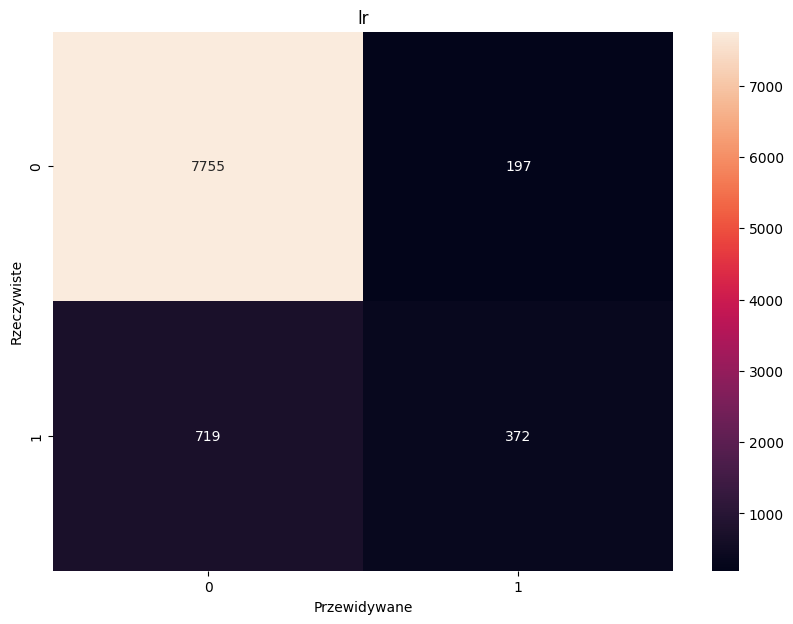

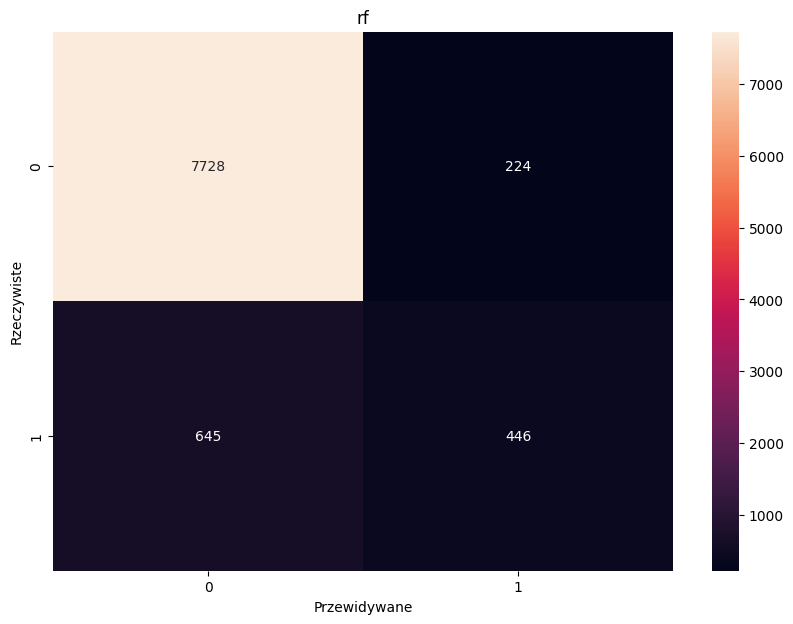

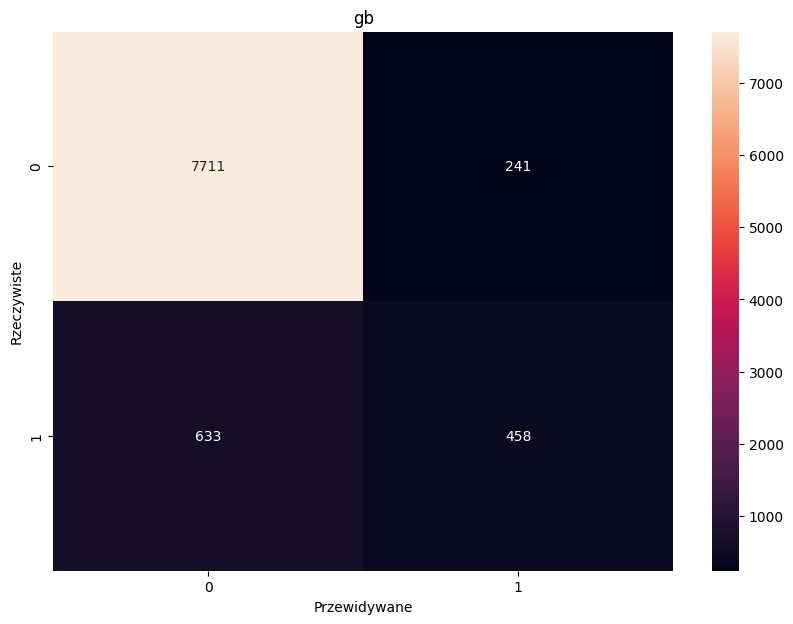

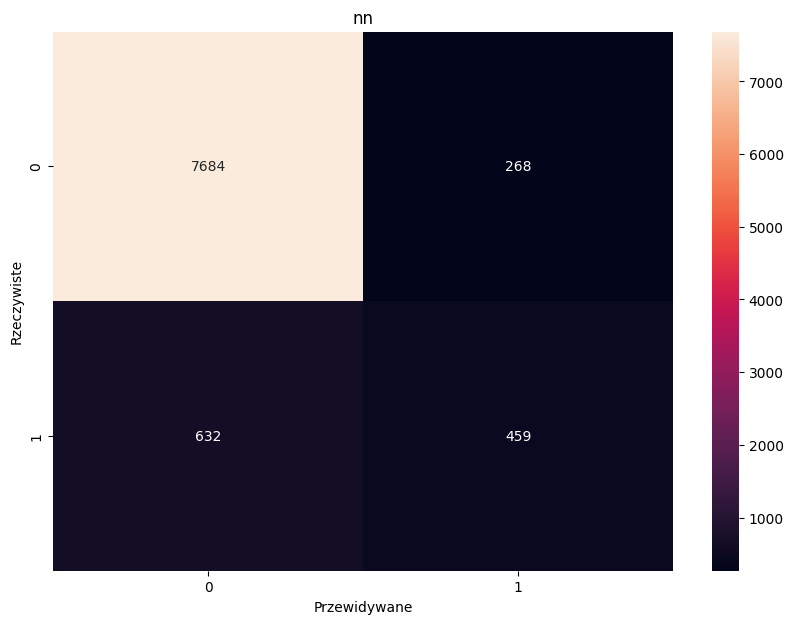

In [ ]:
for model_type in ['lr', 'rf', 'gb' ,'nn']:
    model = train_model(X_train, y_train, model_type)
    plot_confusion_matrix(model, X_test, y_test, model_type)